<a href="https://colab.research.google.com/github/derivai7/PCVK_Ganjil_2023/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PRAKTIKUM**

In [8]:
# Import library
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
import PIL
import io
import html
import time
import numpy as np
import cv2

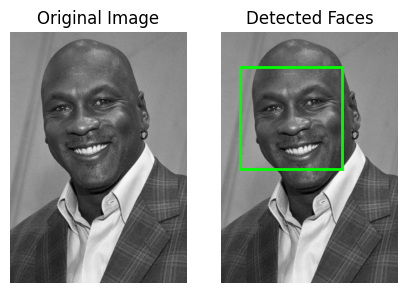

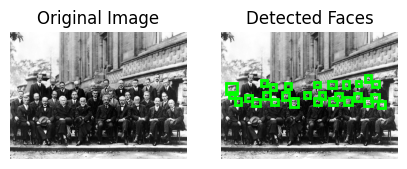

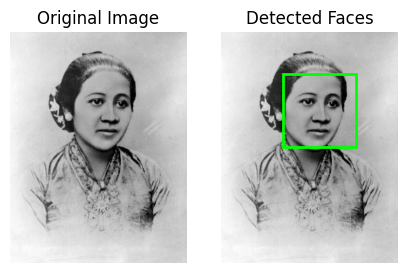

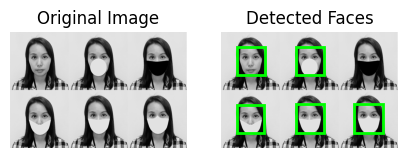

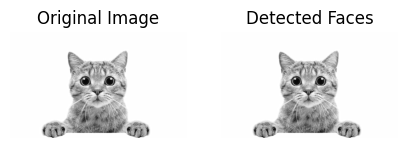

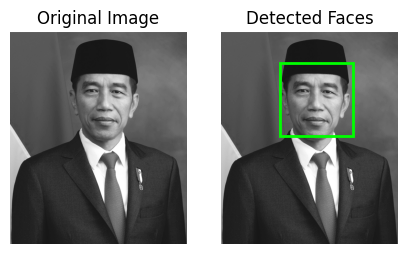

In [18]:
# Load the cascade
face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')

# Path to the folder containing images
folder_path = '/content/drive/MyDrive/dataset/facedet'

# List of images to display
display_images = ['jokowi.jpg', 'kucing.jpg', 'kartini.jpg', 'mask.png', 'mjordan.jpg', 'solvayconf.jpg']

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the image is in the list of images to display
    if filename in display_images:
        # Create the full path to the image file
        filepath = os.path.join(folder_path, filename)

        # Read the input image
        img = cv2.imread(filepath)

        # Convert into grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Display the original and detected image using matplotlib
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 5))

        # Display the original grayscale image
        ax1.imshow(gray, cmap='gray')
        ax1.set_title('Original Image')
        ax1.axis('off')

        # Detect faces
        faces = face_cascade.detectMultiScale(gray)

        # Draw rectangle around the faces
        for (x, y, w, h) in faces:
            rect = plt.Rectangle((x, y), w, h, linewidth=2, edgecolor=(0, 1, 0), facecolor='none')
            ax2.add_patch(rect)

        # Display the image with rectangles
        ax2.imshow(gray, cmap='gray')
        ax2.set_title('Detected Faces')
        ax2.axis('off')

        # Show the plot
        plt.show()

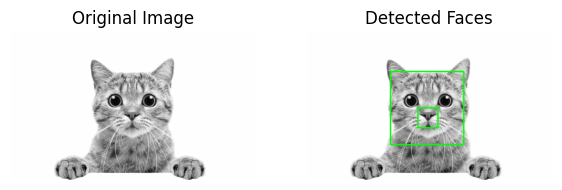

In [ ]:
# Load the cascade for cat faces
cat_face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalcatface_extended.xml')

# Read the input image in grayscale
original_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/kucing.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
original_image_rgb = cv2.cvtColor(original_image_gray, cv2.COLOR_GRAY2RGB)

# Detect cat faces
cat_faces = cat_face_cascade.detectMultiScale(original_image_gray)

# Draw rectangle around the cat faces
for (x, y, w, h) in cat_faces:
    cv2.rectangle(original_image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with rectangles
axes[1].imshow(original_image_rgb, cmap='gray')
axes[1].set_title('Detected Faces')
axes[1].axis('off')

plt.show()

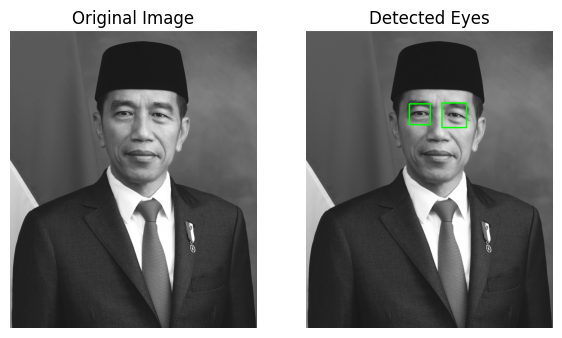

In [ ]:
# Load the cascade for eye detection
eye_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_eye.xml')

# Read the input image in grayscale
original_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/jokowi.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
original_image_rgb = cv2.cvtColor(original_image_gray, cv2.COLOR_GRAY2RGB)

# Detect eyes
eyes = eye_cascade.detectMultiScale(original_image_gray)

# Draw rectangle around the eyes
for (x, y, w, h) in eyes:
    cv2.rectangle(original_image_rgb, (x, y), (x+w, y+h), (0, 255, 0), 3)

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(original_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with rectangles around eyes
axes[1].imshow(original_image_rgb, cmap='gray')
axes[1].set_title('Detected Eyes')
axes[1].axis('off')

plt.show()

<IPython.core.display.Javascript object>

(480, 640)
Saved to Bahtiar_Face.jpg


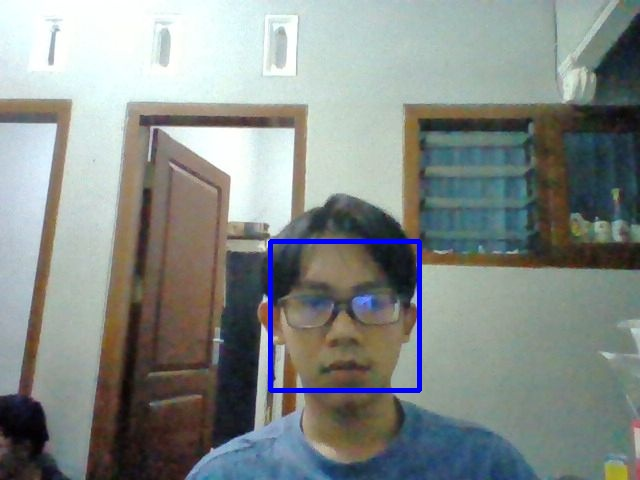

In [17]:
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv2.imdecode(jpg_as_np, flags=1)
    return img

def bbox_to_bytes(bbox_array):
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='png')
    bbox_bytes = 'data:image/png;base64,{}'.format(str(b64encode(iobuf.getvalue()), 'utf-8'))
    return bbox_bytes

face_cascade = cv2.CascadeClassifier('/content/drive/MyDrive/dataset/haarcascades/haarcascade_frontalface_alt.xml')

def take_photo(filename='zalna.jpg', quality=0.8):
    js_code = '''
        async function takePhoto(quality) {
          const div = document.createElement('div');
          const capture = document.createElement('button');
          capture.textContent = 'Capture';
          div.appendChild(capture);

          const video = document.createElement('video');
          video.style.display = 'block';
          const stream = await navigator.mediaDevices.getUserMedia({ video: true });

          document.body.appendChild(div);
          div.appendChild(video);
          video.srcObject = stream;
          await video.play();

          // Resize the output to fit the video element.
          google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

          // Wait for Capture to be clicked.
          await new Promise((resolve) => capture.onclick = resolve);

          const canvas = document.createElement('canvas');
          canvas.width = video.videoWidth;
          canvas.height = video.videoHeight;
          canvas.getContext('2d').drawImage(video, 0, 0);
          stream.getVideoTracks()[0].stop();
          div.remove();
          return canvas.toDataURL('image/jpeg', quality);
        }
    '''
    display(Javascript(js_code))

    # Get photo data
    data = eval_js('takePhoto({})'.format(quality))
    # Get OpenCV format image
    img = js_to_image(data)
    # Convert image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    print(gray.shape)
    # Detect face bounding box using Haar Cascade
    faces = face_cascade.detectMultiScale(gray)
    # Draw face bounding box on the image
    for (x, y, w, h) in faces:
        img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 3)
    # Save the image
    cv2.imwrite(filename, img)

    return filename

try:
    captured_filename = take_photo('Bahtiar_Face.jpg')
    print('Saved to {}'.format(captured_filename))

    # Show the captured image
    display(Image(captured_filename))
except Exception as err:
    print(str(err))

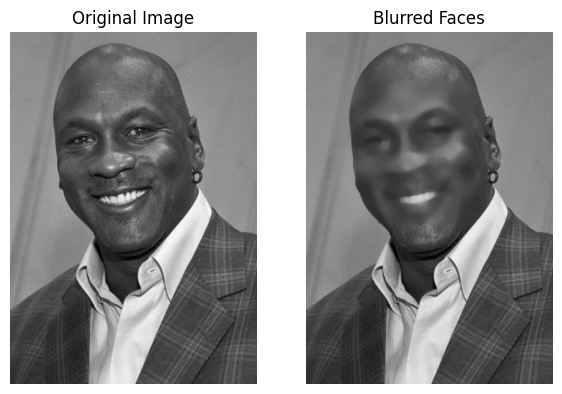

In [23]:
# Read the input image in grayscale
input_image_gray = cv2.imread('/content/drive/MyDrive/dataset/facedet/mjordan.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB for displaying with rectangles
input_image_rgb = cv2.cvtColor(input_image_gray, cv2.COLOR_GRAY2RGB)

# Detect faces
faces = face_cascade.detectMultiScale(input_image_gray)

# Apply blurring to detected faces
for (x, y, w, h) in faces:
    face_region = input_image_rgb[y:y+h, x:x+w]
    blurred_face_region = cv2.medianBlur(face_region, 15)
    input_image_rgb[y:y+h, x:x+w] = blurred_face_region

# Display the original and detected images
fig, axes = plt.subplots(1, 2, figsize=(7, 7))

# Display the original image
axes[0].imshow(input_image_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the image with blurred faces
axes[1].imshow(input_image_rgb, cmap='gray')
axes[1].set_title('Blurred Faces')
axes[1].axis('off')

plt.show()

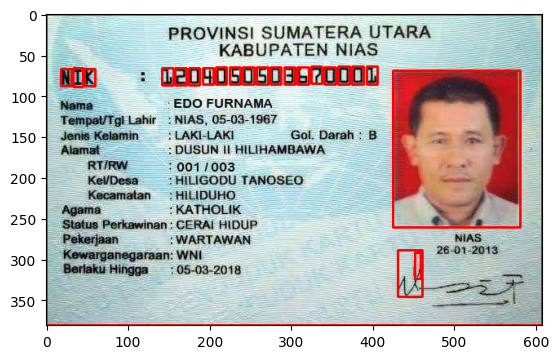

In [27]:
image = cv2.imread('/content/drive/MyDrive/dataset/KTP More/ktp5.png')

blurred = cv2.GaussianBlur(image, (5, 5), 0.5)
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 30 and w >= 5 and float(ras) <= 2:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 20 and w >= 5 and float(ras) <= 3:
      cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

ktp_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(ktp_rgb)
plt.show()

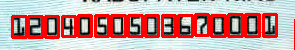

In [28]:
image_croped = image[50:100, 130:425]
cv2_imshow(image_croped)